# Data Wrangling with Pandas

Now we will explore some advanced features of Pandas.

In [2]:
import pandas as pd
import numpy as np

## Merge, join, concat

Merge or join operations combine dataframes by joining rows using one or more keys.

Concat combines dataframes in a block-like fashion, along index or columns.

### Merge
Think of merge as aligning on columns.

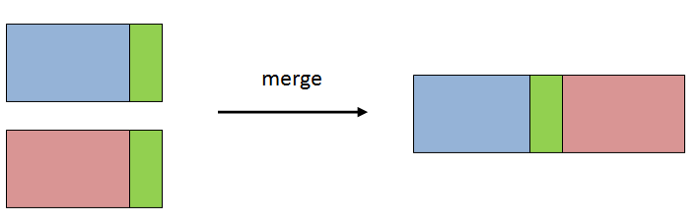  
[Image taken from towardsdatascience.com](https://towardsdatascience.com/3-key-differences-between-merge-and-concat-functions-of-pandas-ab2bab224b59)

#### Example
In our microbiology lab, we have two tables: one for samples and the incubator they were grown in, one for incubators and their temperature.

In [3]:
samples = pd.DataFrame(
    {"sample":["XYZ00001", "XYZ00002", "XYZ00003"],
     "incubator": [1,2,1]},
)

incubators=pd.DataFrame({"incubator": [1,2], "Temperature": [20, 30]})

In [4]:
samples

,sample,incubator
0,XYZ00001,1
1,XYZ00002,2
2,XYZ00003,1


In [5]:
incubators

,incubator,Temperature
0,1,20
1,2,30


##### Task: Make a table that lists the incubator temperature for each sample.

In [6]:
pd.merge(samples, incubators, on="incubator")

,sample,incubator,Temperature
0,XYZ00001,1,20
1,XYZ00003,1,20
2,XYZ00002,2,30


In [7]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 
                    'data1': range(7)})

In [8]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [9]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd',], 
                    'data2': range(3)})

In [10]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


merge(df1, df2) = 

| index | key | data1 | data2 |
|-------|-----|-------|-------|
| 0     | b   |  0    | 1     | 
| 1     | b   |  1    | 1     | 
| 2     | a   |  2    | 0     | 
| 3     | c   |  3    | ??    | 
| 4     | a   |  4    | 0     | 
| 5     | a   |  5    | 0     | 
| 6     | b   |  6    | 1     | 
| 7     | d   |  ??   | 2     | 

When not specified, `merge` uses the column names that are common to both
dataframes as the key.

In [11]:
pd.merge(df1, df2, how="inner")

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [12]:
pd.merge(df1, df2, how="outer")

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


We may want to specify the key column explicitely:

In [13]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


If the column names are different in each dataframe, then we can specify them separately. 

In [14]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 
                    'data1': range(7)})

df4 = pd.DataFrame({'rkey': ['a', 'b','d',], 
                    'data2': range(3)})

In [15]:
df3

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [16]:
df4

,rkey,data2
0,a,0
1,b,1
2,d,2


In [17]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey', how="left")

,lkey,data1,rkey,data2
0,b,0,b,1.0
1,b,1,b,1.0
2,a,2,a,0.0
3,c,3,NaN,NaN
4,a,4,a,0.0
5,a,5,a,0.0
6,b,6,b,1.0


Note that keys 'c', 'd', and data associated with them are missing. This is the default behaviour of `merge` which performs an **`inner`** join that results in intersection of keys. 

Other options to join are **`left`** and **`right`**

In [18]:
pd.merge(df1, df2, how='left')

,key,data1,data2
0,b,0,1.0
1,b,1,1.0
2,a,2,0.0
3,c,3,NaN
4,a,4,0.0
5,a,5,0.0
6,b,6,1.0


In [19]:
pd.merge(df1, df2, how='right')

,key,data1,data2
0,a,2.0,0
1,a,4.0,0
2,a,5.0,0
3,b,0.0,1
4,b,1.0,1
5,b,6.0,1
6,d,NaN,2


In [20]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


**`outer`** join takes the union of the keys, which combines the result of the **`left`** and **`right`** joins.

In [21]:
### Try to predict this merge operation:

In [22]:
df6 = pd.DataFrame({'key': ['a', 'b', 'd', 'a'], 
                    'data2': [0, 1, 2, 3 ]})

In [23]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [24]:
df6

,key,data2
0,a,0
1,b,1
2,d,2
3,a,3


In [25]:
pd.merge(df1, df6, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,2.0,3.0
5,a,4.0,0.0
6,a,4.0,3.0
7,a,5.0,0.0
8,a,5.0,3.0
9,c,3.0,NaN


We can merge DataFrames that have multiple common columns:

In [26]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'], 
                   'key2': ['one', 'two', 'one'],
                   'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})

In [27]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [28]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [29]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


Occasionally, there will be columns with the same name in both tables that we do not wish to merge as they may contain different information despite having the same name. 

In this case, Pandas will by default append suffixes `_x` and `_y` to the columns to uniquely identify them.

In [30]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


This behavior can be overridden by specifying a `suffixes` argument, containing a list of the suffixes to be used for the columns of the left and right dataframes, respectively.

In [31]:
pd.merge(left, right, on='key1', suffixes=('_l', '_r'))

,key1,key2_l,lval,key2_r,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


#### Pass indexes of one of the DataFrames as keys

In [32]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


Set key1 as the index.

In [33]:
right_in = right.set_index('key1')
right_in

,key2,rval
key1,,
foo,one,4
foo,one,5
bar,one,6
bar,two,7


In [34]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


Use index of right_in and key1 of left to merge the two dataframes.

In [35]:
pd.merge(left, right_in, left_on=['key1'], right_index=True)

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
0,foo,one,1,one,5
1,foo,two,2,one,4
1,foo,two,2,one,5
2,bar,one,3,one,6
2,bar,one,3,two,7


#### Calling `merge` as a method on a DataFrame

In [36]:
left.merge(right)

,key1,key2,lval,rval
0,foo,one,1,4
1,foo,one,1,5
2,bar,one,3,6


## Join

### `join` is used to merge by index:

### Example: GDP and unemployment in the US
Let's look at some real world data: Datasets for employment and GDP (gross domestic product) from https://datahub.io/core/employment-us and https://datahub.io/core/gdp-us, respectively.

In [67]:
us_employment = pd.read_csv('https://datahub.io/core/employment-us/r/aat1.csv', index_col="year")

In [68]:
us_gdp = pd.read_csv('https://datahub.io/core/gdp-us/r/year.csv', index_col="date")

In [69]:
us_employment.head()

,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
year,,,,,,,,,,,
1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990,NaN
1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230,NaN
1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100,NaN
1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590,NaN
1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230,NaN


In [70]:
us_gdp.head()

,level-current,level-chained,change-current,change-chained
date,,,,
1930,92.2,966.7,-16.0,-6.4
1931,77.4,904.8,-23.1,-12.9
1932,59.5,788.2,-4.0,-1.3
1933,57.2,778.3,16.9,10.8
1934,66.8,862.2,11.1,8.9


### Task: Join the employment and gdp datasets.
Both datasets have the year as index. Hence, we can easily join them:

In [71]:
us_employment.join(us_gdp)

,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes,level-current,level-chained,change-current,change-chained
1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990,NaN,129.4,1490.3,28.3,18.9
1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230,NaN,166.0,1771.8,22.4,17.0
1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100,NaN,203.1,2073.7,10.5,8.0
1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590,NaN,224.6,2239.4,1.6,-1.0
1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230,NaN,228.2,2217.8,-0.2,-11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,228815,151428,66.2,144427,63.1,2206,142221,7001,4.6,77387,1.0,13855.9,14613.8,4.5,1.8
2007,231867,153124,66.0,146047,63.0,2095,143952,7078,4.6,78743,1.0,14477.6,14873.7,1.7,-0.3
2008,233788,154287,66.0,145362,62.2,2168,143194,8924,5.8,79501,1.0,14718.6,14830.4,-2.0,-2.8
2009,235801,154142,65.4,139877,59.3,2103,137775,14265,9.3,81659,1.0,14418.7,14418.7,3.8,2.5


By default, `join` joins on the intersection of indices.

Let's keep all years present in any of the two datasets:

In [42]:
us_employment.join(us_gdp, how='outer').head(20)

,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes,level-current,level-chained,change-current,change-chained
1930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.2,966.7,-16.0,-6.4
1931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.4,904.8,-23.1,-12.9
1932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.5,788.2,-4.0,-1.3
1933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.2,778.3,16.9,10.8
1934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.8,862.2,11.1,8.9
1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.3,939.0,14.3,12.9
1936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.9,1060.5,9.6,5.1
1937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,1114.6,-6.1,-3.3
1938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.4,1077.7,7.0,8.0
1939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.5,1163.6,10.1,8.8


Again, the `join` kwarg accepts `left` and `right` as well.

## Concatenation

Concatenation, binding, or stacking all refer to the same data combination operation. For Pandas objects, Series and DataFrames, the presence of labelled axes permits generalised array concatenation. In order to perform concatenation, we need to think about:

1. Along which axis to concatenate? 0 (index) or 1 (columns) ?
1. How do we treat the **other** axis?
1. If the **other** axes (index or columns) are labelled differently, do we need a **union** or **intersection** of the axes?
1. Do we need to identify groups in the resulting object?

### Union or intersection
Let's say we have three Series without any index overlap:

In [43]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [44]:
s1

a    0
b    1
dtype: int64

In [45]:
s2

c    2
d    3
e    4
dtype: int64

In [46]:
s3

f    5
g    6
dtype: int64

We can call `concat` to glue these objects together into a list.

In [47]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

By default, `concat` has stacked the three Series along the axis=0 (index). However, what if we pass axis=1:

In [48]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


Now, we get a DataFrame. As there is no overlap on the other axis (axis=0),  the `concat` is identical to an outer `join`.

In [49]:
d1 = pd.DataFrame(s1, columns=[0])
d2 = pd.DataFrame(s2, columns=[1])
d3 = pd.DataFrame(s3, columns=[2])

In [50]:
d1.join(d2, how="outer").join(d3, how="outer")

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [51]:
## Can we do this with a merge?
pd.merge(d1, d2, left_index=True, right_index=True, how='outer').merge(d3, left_index=True, right_index=True, how='outer')

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


Let's create a new Series that has overlapping indices with `s1`, and `s2`

In [52]:
s4 = pd.concat([s1 * 4, s2])
s4

a    0
b    4
c    2
d    3
e    4
dtype: int64

In [53]:
s1

a    0
b    1
dtype: int64

We concat along the columns:

In [54]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,4
c,NaN,2
d,NaN,3
e,NaN,4


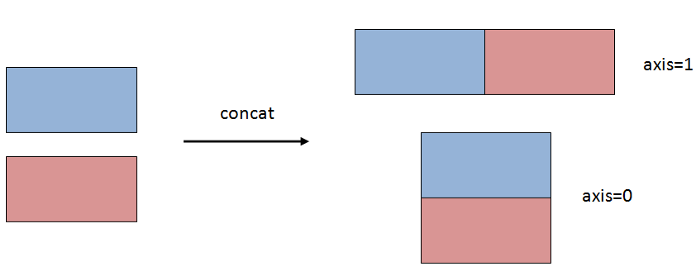
[Image taken from towardsdatascience.com](https://towardsdatascience.com/3-key-differences-between-merge-and-concat-functions-of-pandas-ab2bab224b59)

To intersect, we pass `join=inner`.

In [55]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,4


### Retaining identity

It is possible that the concatenated pieces cannot be identified in the result. 

In [56]:
pd.concat([s1, s1, s3])

a    0
b    1
a    0
b    1
f    5
g    6
dtype: int64

To ensure proper identification of elements, we can create a hierarchical index with the `keys` argument:

In [57]:
retain_id = pd.concat([s1, s1, s3], keys=['first', 'second', 'third'])
retain_id

first   a    0
        b    1
second  a    0
        b    1
third   f    5
        g    6
dtype: int64

The `unstack` method then splits the hierarchical index into index and columns.

In [58]:
retain_id.unstack()

,a,b,f,g
first,0.0,1.0,NaN,NaN
second,0.0,1.0,NaN,NaN
third,NaN,NaN,5.0,6.0


When we combine along `axis=1`, the `keys` argument passes column headers for the resulting DataFrame:

In [59]:
pd.concat([s1, s1, s3], axis=1, keys=['first', 'second', 'third'])

,first,second,third
a,0.0,0.0,NaN
b,1.0,1.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


This also extends to DataFrames:

In [60]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), 
                index=['a', 'b', 'c'],
                columns=['one', 'two'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [61]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2),
                index=['a', 'c'],
                columns=['three', 'four'])
df2

,three,four
a,5,6
c,7,8


In [62]:
pd.concat([df1, df2], axis=1, keys=['first', 'second'])

first     second     
    one two  three four
a     0   1    5.0  6.0
b     2   3    NaN  NaN
c     4   5    7.0  8.0

#### Excercise: Make a list of all the other additional arguments that can be passed to the `concat` operation and explain their role.

### Recap: Merge - Join - Concat
* **Merge**: Horizontally stack the columns of two DFs. Key indicates the column from which to take the values to align rows on.
* **Join**:  Like `merge`, based on index.  Used as a method on a DF. Can use a column in "other" as index.
* **Concat**: `join` along index or columns. Concat with `axis=1` behaves like `join`. Mostly used to combine two or more datasets of the same or similar kind. 

    

In [72]:
# Example:
us_employment_before_2000 = us_employment[us_employment.index < 2000]
us_employment_after_2000  = us_employment[us_employment.index >= 2000]

In [73]:
us_employment_before_2000.tail()

,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
year,,,,,,,,,,,
1995,198584,132304,66.6,124900,62.9,3440,121460,7404,5.6,66280,NaN
1996,200591,133943,66.8,126708,63.2,3443,123264,7236,5.4,66647,NaN
1997,203133,136297,67.1,129558,63.8,3399,126159,6739,4.9,66836,1.0
1998,205220,137673,67.1,131463,64.1,3378,128085,6210,4.5,67547,1.0
1999,207753,139368,67.1,133488,64.3,3281,130207,5880,4.2,68385,1.0


In [74]:
us_employment_after_2000.head()

,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
year,,,,,,,,,,,
2000,212577,142583,67.1,136891,64.4,2464,134427,5692,4.0,69994,1.0
2001,215092,143734,66.8,136933,63.7,2299,134635,6801,4.7,71359,NaN
2002,217570,144863,66.6,136485,62.7,2311,134174,8378,5.8,72707,NaN
2003,221168,146510,66.2,137736,62.3,2275,135461,8774,6.0,74658,1.0
2004,223357,147401,66.0,139252,62.3,2232,137020,8149,5.5,75956,1.0


In [75]:
pd.concat([us_employment_before_2000, us_employment_after_2000], axis=0)

,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
year,,,,,,,,,,,
1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990,NaN
1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230,NaN
1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100,NaN
1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590,NaN
1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2006,228815,151428,66.2,144427,63.1,2206,142221,7001,4.6,77387,1.0
2007,231867,153124,66.0,146047,63.0,2095,143952,7078,4.6,78743,1.0
2008,233788,154287,66.0,145362,62.2,2168,143194,8924,5.8,79501,1.0


### Recommended further reading: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

## Combinig data that overlaps

Let's say you and your friend are required to finish an assignment that has ten parts. Although you are a team,  still you are to be scored individually. You both decided to perform this task individually knowing fully well that time is limited. You could only finish seven parts, and your friend has finished nine parts. However, you do not fully trust the problem-solving skills of your friend. Hence, you decided to copy only the answers to the sections that you did not finish. 

In [ ]:
Yours = pd.Series([10, 23, 57, 65, 88, 97, 203, np.nan, np.nan, np.nan], index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
Yours

In [ ]:
Friends = pd.Series([10, 23, 59, 65, 82, 97, 203, 0, 29, np.nan], index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
Friends

### combine_first
We can use the `combine_first` method to just copy those answers that are null in your assignment.

In [ ]:
Yours.combine_first(Friends)

If this were to happen on subsequent days, then we can make DataFrame for each day and `combine_first`  method will perform the same action in a column-wise manner on the DataFrame.

In [ ]:
YourDf = pd.DataFrame({'Day1':[10, 23, 57, 65, 88, 97, 203, np.nan, np.nan, np.nan],
                      'Day2':[20, 54, 99, 107, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]},
                      index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
YourDf

In [ ]:
FriendDf = pd.DataFrame({'Day1':[10, 23, 59, 65, 82, 97, 203, 0, 29, np.nan],
                      'Day2':[20, 54, 95, 107, 36, 55, 109, np.nan, np.nan, np.nan]},
                      index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
FriendDf

In [ ]:
YourDf.combine_first(FriendDf)

## Reshaping DataFrames

In the context of a single DataFrame, we are often interested in re-arranging the layout of our data. 

The following dataset is from the Table 6.9 of [Statistical Methods for the Analysis of Repeated Measurements](http://www.amazon.com/Statistical-Methods-Analysis-Repeated-Measurements/dp/0387953701) by Charles S. Davis, pp. 161-163 (Springer, 2002). These data are from a multicenter, randomised controlled trial of botulinum toxin type B (BotB) in patients with cervical dystonia from nine U.S. sites.

* Randomized to placebo (N=36), 5000 units of BotB (N=36), 10,000 units of BotB (N=37)
* Response variable: total score on Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment)
* TWSTRS measured at baseline (week 0) and weeks 2, 4, 8, 12, 16 after treatment began

In [92]:
cdystonia = pd.read_csv("https://owncloud.gwdg.de/index.php/s/I73qsTW3HJX8V21/download", index_col=None)
cdystonia.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


### stack and unstack
The `stack` method rotates the data frame so that columns are represented in rows:

In [93]:
stacked = cdystonia.stack()
stacked.head(18)

0  patient        1
   obs            1
   week           0
   site           1
   id             1
   treat      5000U
   age           65
   sex            F
   twstrs        32
1  patient        1
   obs            2
   week           2
   site           1
   id             1
   treat      5000U
   age           65
   sex            F
   twstrs        30
dtype: object

To complement this, `unstack` pivots from rows back to columns.

In [94]:
stacked.unstack().head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


Here, it makes sense to make a hierarchical index including the patient and observation:

#### Exercise
Is the index unique? If not, make it unique by combining it with the obs column (make a hierarchical index).

In [95]:
cdystonia2 = cdystonia.set_index(['patient','obs'])
cdystonia2.head()

week  site  id  treat  age sex  twstrs
patient obs                                        
1       1       0     1   1  5000U   65   F      32
        2       2     1   1  5000U   65   F      30
        3       4     1   1  5000U   65   F      24
        4       8     1   1  5000U   65   F      37
        5      12     1   1  5000U   65   F      39

In [96]:
cdystonia2.index.is_unique

True

If we want to transform this data so that repeated measurements are in columns, we can `unstack` the `twstrs` measurements according to `obs`.

In [98]:
twstrs_wide = cdystonia2.unstack('obs')['twstrs']
twstrs_wide.head()

obs,1,2,3,4,5,6
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0


Select the columns related to patient data:

In [100]:
cdystonia[['patient','site','id','treat','age','sex']].head()

,patient,site,id,treat,age,sex
0,1,1,1,5000U,65,F
1,1,1,1,5000U,65,F
2,1,1,1,5000U,65,F
3,1,1,1,5000U,65,F
4,1,1,1,5000U,65,F


### Dealing with duplicates
We can easily identify and remove duplicate values from `DataFrame` objects.

In [101]:
cdystonia[['patient','site','id','treat','age','sex']].drop_duplicates().head()

,patient,site,id,treat,age,sex
0,1,1,1,5000U,65,F
6,2,1,2,10000U,70,F
12,3,1,3,5000U,64,F
18,4,1,4,Placebo,59,F
22,5,1,5,10000U,76,F


By default, `.drop_duplicates()` removes all records
with duplicate values in any column. To consider only
certain columns, pass the `subset` argument.

### Exercise: Investigate the `drop_duplicates()` method and remove all but the last records with patients that have the same age.

In [163]:
# Solution
unique_ages = cdystonia.drop_duplicates(
    subset=['age'],
    keep='last'
)
unique_ages.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
27,5,6,16,1,5,10000U,76,F,51
75,13,6,16,2,1,Placebo,70,F,44
99,17,6,16,2,5,10000U,45,F,66
111,19,6,16,2,7,10000U,49,F,43
129,22,6,16,2,10,Placebo,31,M,43


In [164]:
# test that 'age' is unique
unique_ages.age.value_counts()

63    1
40    1
36    1
35    1
34    1
31    1
26    1
83    1
79    1
77    1
76    1
75    1
74    1
73    1
72    1
70    1
69    1
68    1
67    1
66    1
65    1
39    1
41    1
62    1
42    1
61    1
60    1
59    1
58    1
57    1
56    1
55    1
54    1
53    1
52    1
51    1
50    1
49    1
48    1
47    1
46    1
45    1
44    1
43    1
64    1
Name: age, dtype: int64

In [166]:
# or shorter:
unique_ages.age.is_unique

True

Now merge with the wide "twstr" score data:

In [102]:
cdystonia_wide = (cdystonia[['patient','site','id','treat','age','sex']]
                  .drop_duplicates()
                  .merge(twstrs_wide, right_index=True, left_on='patient', how='inner')
                  .head())
cdystonia_wide

,patient,site,id,treat,age,sex,1,2,3,4,5,6
0,1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
6,2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
12,3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
18,4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
22,5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0


A cleaner way of achieving the same is by setting the patient-specific information as an index prior to unstacking:

In [284]:
(cdystonia.set_index(
    ['patient',
     'site',
     'id',
     'treat',
     'age',
     'sex',
     'week'
    ])['twstrs']
     .unstack('week').head())

,,,,,week,0,2,4,8,12,16
patient,site,id,treat,age,sex,,,,,,
1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
10,1,10,Placebo,47,M,27.0,10.0,31.0,32.0,6.0,14.0
100,9,2,Placebo,59,M,61.0,52.0,61.0,68.0,59.0,71.0
101,9,3,5000U,57,M,35.0,21.0,29.0,30.0,35.0,48.0
102,9,4,Placebo,68,F,58.0,38.0,50.0,53.0,47.0,59.0


### melt

The `melt` function is useful for DataFrames having one or more columns as identifier variables (`id_vars`), and the remaining columns as measured variables (`value_vars`). 


In [397]:
pd.melt(cdystonia_wide, id_vars=['patient','site','id','treat','age','sex'], 
       ).head()

,patient,site,id,treat,age,sex,variable,value
0,1,1,1,5000U,65,F,1,32.0
1,1,1,1,5000U,65,F,1,32.0
2,1,1,1,5000U,65,F,1,32.0
3,1,1,1,5000U,65,F,1,32.0
4,1,1,1,5000U,65,F,1,32.0


To enhance the clarity, we rename the "variable" and "value" columns:

In [399]:
pd.melt(cdystonia_wide, id_vars=['patient','site','id','treat','age','sex'], 
        var_name='obs', value_name='twsters',
       ).head()

,patient,site,id,treat,age,sex,obs,twsters
0,1,1,1,5000U,65,F,1,32.0
1,2,1,2,10000U,70,F,1,60.0
2,3,1,3,5000U,64,F,1,44.0
3,4,1,4,Placebo,59,F,1,53.0
4,5,1,5,10000U,76,F,1,53.0


The measured variables were "unpivoted" to the row axis, leaving just two non-identifier columns, a *variable* (renamed `obs`) and its corresponding *value* (renamed `twsters`).

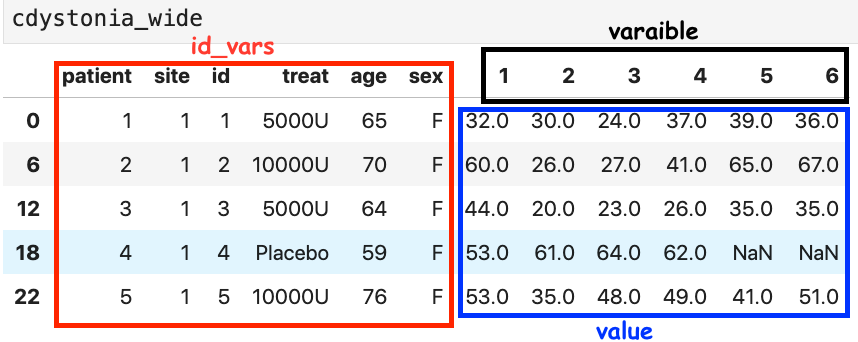

This illustrates the **long** and the **wide** formats. Its  better to store data in the long format as further data can be appended to the dataframe as new rows.

## Pivoting

The `pivot` method allows a DataFrame to switch between long and wide formats. 

It takes three arguments: `index`, `columns` and `values`, corresponding to the DataFrame index (the row headers), columns and cell values, respectively.

For example, we may want the `twstrs` variable (the response variable) in wide format according to patient, as we saw with the unstacking method above:

In [103]:
cdystonia.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


In [104]:
cdystonia.pivot(index='patient', columns='obs', values='twstrs').head()

obs,1,2,3,4,5,6
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0


In [91]:
cdystonia.pivot(index=['patient','site','treat'], columns=['week'], values='twstrs').head()

,,week,0,2,4,8,12,16
patient,site,treat,,,,,,
1,1,5000U,32.0,30.0,24.0,37.0,39.0,36.0
2,1,10000U,60.0,26.0,27.0,41.0,65.0,67.0
3,1,5000U,44.0,20.0,23.0,26.0,35.0,35.0
4,1,Placebo,53.0,61.0,64.0,62.0,NaN,NaN
5,1,10000U,53.0,35.0,48.0,49.0,41.0,51.0


Add more data as index

In [183]:
cdystonia.pivot(index=['patient','id', 'site','age',], columns=['obs'], values='twstrs').head()

,,,obs,1,2,3,4,5,6
patient,id,site,age,,,,,,
1,1,1,65,32.0,30.0,24.0,37.0,39.0,36.0
10,10,1,47,27.0,10.0,31.0,32.0,6.0,14.0
100,2,9,59,61.0,52.0,61.0,68.0,59.0,71.0
101,3,9,57,35.0,21.0,29.0,30.0,35.0,48.0
102,4,9,68,58.0,38.0,50.0,53.0,47.0,59.0


If we omit the `values` argument, we get a `DataFrame` with hierarchical columns, just as when we applied `unstack` to the hierarchically-indexed table:

In [286]:
cdystonia.pivot('patient', 'obs')

week                            site                 ... twstrs        \
obs        1    2    3    4     5     6    1    2    3    4  ...      3     4   
patient                                                      ...                
1        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...   24.0  37.0   
10       0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...   31.0  32.0   
100      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...   61.0  68.0   
101      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...   29.0  30.0   
102      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...   50.0  53.0   
...      ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...    ...   ...   
95       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...   13.0  16.0   
96       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...   22.0  28.0   
97       0.0  NaN  4.0  8.0  12.0  16.0  8.0  NaN  8.0  8.0  ...   41.0  41.0   
98       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...   29.0  30.0   
99       0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...   18.0  25.0   

                    treatment                           
obs         5     6         1    2    3    4    5    6  
patient                                                 
1        39.0  36.0       1.0  1.0  1.0  1.0  1.0  1.0  
10        6.0  14.0       0.0  0.0  0.0  0.0  0.0  0.0  
100      59.0  71.0       0.0  0.0  0.0  0.0  0.0  0.0  
101      35.0  48.0       1.0  1.0  1.0  1.0  1.0  1.0  
102      47.0  59.0       0.0  0.0  0.0  0.0  0.0  0.0  
...       ...   ...       ...  ...  ...  ...  ...  ...  
95       32.0  16.0       1.0  1.0  1.0  1.0  1.0  1.0  
96       34.0  36.0       2.0  2.0  2.0  2.0  2.0  2.0  
97       58.0  53.0       0.0  NaN  0.0  0.0  0.0  0.0  
98       37.0  44.0       2.0  2.0  2.0  2.0  2.0  2.0  
99       33.0  48.0       2.0  2.0  2.0  2.0  2.0  2.0  

[109 rows x 48 columns]

#### Select multiple columns

In [402]:
cdystonia.pivot(index='patient', columns=['obs', 'sex'], values=['week', 'twstrs'])

week                                                 ... twstrs        \
obs        1    2    3    4     5     6    1    2    3    4  ...      3     4   
sex        F    F    F    F     F     F    M    M    M    M  ...      F     F   
patient                                                      ...                
1        0.0  2.0  4.0  8.0  12.0  16.0  NaN  NaN  NaN  NaN  ...   24.0  37.0   
10       NaN  NaN  NaN  NaN   NaN   NaN  0.0  2.0  4.0  8.0  ...    NaN   NaN   
100      NaN  NaN  NaN  NaN   NaN   NaN  0.0  2.0  4.0  8.0  ...    NaN   NaN   
101      NaN  NaN  NaN  NaN   NaN   NaN  0.0  2.0  4.0  8.0  ...    NaN   NaN   
102      0.0  2.0  4.0  8.0  12.0  16.0  NaN  NaN  NaN  NaN  ...   50.0  53.0   
...      ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...    ...   ...   
95       0.0  2.0  4.0  8.0  12.0  16.0  NaN  NaN  NaN  NaN  ...   13.0  16.0   
96       0.0  2.0  4.0  8.0  12.0  16.0  NaN  NaN  NaN  NaN  ...   22.0  28.0   
97       NaN  NaN  NaN  NaN   NaN   NaN  0.0  NaN  4.0  8.0  ...    NaN   NaN   
98       0.0  2.0  4.0  8.0  12.0  16.0  NaN  NaN  NaN  NaN  ...   29.0  30.0   
99       NaN  NaN  NaN  NaN   NaN   NaN  0.0  2.0  4.0  8.0  ...    NaN   NaN   

                                                         
obs         5     6     1     2     3     4     5     6  
sex         F     F     M     M     M     M     M     M  
patient                                                  
1        39.0  36.0   NaN   NaN   NaN   NaN   NaN   NaN  
10        NaN   NaN  27.0  10.0  31.0  32.0   6.0  14.0  
100       NaN   NaN  61.0  52.0  61.0  68.0  59.0  71.0  
101       NaN   NaN  35.0  21.0  29.0  30.0  35.0  48.0  
102      47.0  59.0   NaN   NaN   NaN   NaN   NaN   NaN  
...       ...   ...   ...   ...   ...   ...   ...   ...  
95       32.0  16.0   NaN   NaN   NaN   NaN   NaN   NaN  
96       34.0  36.0   NaN   NaN   NaN   NaN   NaN   NaN  
97        NaN   NaN  46.0   NaN  41.0  41.0  58.0  53.0  
98       37.0  44.0   NaN   NaN   NaN   NaN   NaN   NaN  
99        NaN   NaN  40.0  16.0  18.0  25.0  33.0  48.0  

[109 rows x 24 columns]

#### Exercise
Pivot the "cdystonia" dataset to get this representation:
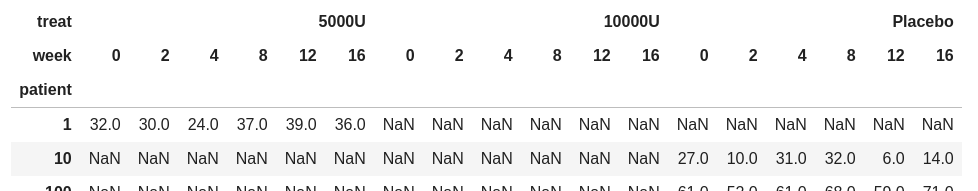

In [405]:
cdystonia.pivot(index="patient", columns=["treat","week"], values='twstrs')

treat   5000U                               10000U                          \
week       0     2     4     8     12    16     0     2     4     8     12   
patient                                                                      
1        32.0  30.0  24.0  37.0  39.0  36.0    NaN   NaN   NaN   NaN   NaN   
10        NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   
100       NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   
101      35.0  21.0  29.0  30.0  35.0  48.0    NaN   NaN   NaN   NaN   NaN   
102       NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   
...       ...   ...   ...   ...   ...   ...    ...   ...   ...   ...   ...   
95       33.0  10.0  13.0  16.0  32.0  16.0    NaN   NaN   NaN   NaN   NaN   
96        NaN   NaN   NaN   NaN   NaN   NaN   41.0  50.0  22.0  28.0  34.0   
97        NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   
98        NaN   NaN   NaN   NaN   NaN   NaN   40.0  28.0  29.0  30.0  37.0   
99        NaN   NaN   NaN   NaN   NaN   NaN   40.0  16.0  18.0  25.0  33.0   

treat         Placebo                                
week       16      0     2     4     8     12    16  
patient                                              
1         NaN     NaN   NaN   NaN   NaN   NaN   NaN  
10        NaN    27.0  10.0  31.0  32.0   6.0  14.0  
100       NaN    61.0  52.0  61.0  68.0  59.0  71.0  
101       NaN     NaN   NaN   NaN   NaN   NaN   NaN  
102       NaN    58.0  38.0  50.0  53.0  47.0  59.0  
...       ...     ...   ...   ...   ...   ...   ...  
95        NaN     NaN   NaN   NaN   NaN   NaN   NaN  
96       36.0     NaN   NaN   NaN   NaN   NaN   NaN  
97        NaN    46.0   NaN  41.0  41.0  58.0  53.0  
98       44.0     NaN   NaN   NaN   NaN   NaN   NaN  
99       48.0     NaN   NaN   NaN   NaN   NaN   NaN  

[109 rows x 18 columns]

### Value replacement

Frequently, we get data columns that are encoded as strings that we wish to represent numerically for the purposes of including it in a quantitative analysis. For example, consider the treatment variable in the cervical dystonia dataset:

In [106]:
cdystonia.treat.value_counts()

10000U     213
5000U      211
Placebo    207
Name: treat, dtype: int64

A logical way to specify these numerically is to change them to integer values, perhaps using "Placebo" as a baseline value. If we create a dict with the original values as keys and the replacements as values, we can pass it to the `map` method to implement the changes.

In [108]:
treatment_map = {'Placebo': 0, '5000U': 1, '10000U': 2}

In [109]:
cdystonia['treatment'] = cdystonia.treat.map(treatment_map)
cdystonia.treatment

0      1
1      1
2      1
3      1
4      1
      ..
626    1
627    1
628    1
629    1
630    1
Name: treatment, Length: 631, dtype: int64

If we simply want to replace particular values in a `Series` or `DataFrame`, we can use the `replace` method. 

An example where replacement is useful is dealing with zeros in certain transformations. For example, if we try to take the log of a set of values:

In [110]:
vals = pd.Series([float(i)**10 for i in range(10)])
vals

0    0.000000e+00
1    1.000000e+00
2    1.024000e+03
3    5.904900e+04
4    1.048576e+06
5    9.765625e+06
6    6.046618e+07
7    2.824752e+08
8    1.073742e+09
9    3.486784e+09
dtype: float64

In [111]:
np.log(vals)

/home/grotec/.conda/envs/default/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         -inf
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

In such situations, we can replace the zero with a value so small that it makes no difference to the ensuing analysis. We can do this with `replace`.

In [112]:
vals = vals.replace(0, 1e-6)
np.log(vals)

0   -13.815511
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

We can also perform the same replacement that we used `map` for with `replace`:

In [293]:
cdystonia2.treat.replace({'Placebo': 0, '5000U': 1, '10000U': 2})

patient  obs
1        1      1
         2      1
         3      1
         4      1
         5      1
               ..
109      1      1
         2      1
         4      1
         5      1
         6      1
Name: treat, Length: 631, dtype: int64

## Categorical Data
Pandas provides a data type for representing categorical (factor) data, called `category`. 

For example, the `treat` column in the cervical dystonia dataset represents three treatment levels in a clinical trial, and is imported by default as an `object` type, since it is a mixture of string characters.

In [294]:
cdystonia.treat.dtype

CategoricalDtype(categories=['10000U', '5000U', 'Placebo'], ordered=False)

We can convert this to a `category` type either by the `Categorical` constructor, or casting the column using `astype`:

In [295]:
pd.Categorical(cdystonia.treat)

['5000U', '5000U', '5000U', '5000U', '5000U', ..., '5000U', '5000U', '5000U', '5000U', '5000U']
Length: 631
Categories (3, object): ['10000U', '5000U', 'Placebo']

In [113]:
cdystonia['treat'] = cdystonia.treat.astype('category')

In [116]:
cdystonia.treat.dtype

CategoricalDtype(categories=['10000U', '5000U', 'Placebo'], ordered=False)

By default the Categorical type represents an unordered categorical.

### Discretisation

Pandas `cut` operation can be used to group continuous or countable data into bins. 

Discretisation is in general a **bad idea** for statistical analysis, so mind this function!

Lets bin the ages of the cervical dystonia patients into a number of groups:

In [117]:
cdystonia.age.describe()

count    631.000000
mean      55.616482
std       12.123910
min       26.000000
25%       46.000000
50%       56.000000
75%       65.000000
max       83.000000
Name: age, dtype: float64

We can transform these data into decades, starting with individuals in their 20's and upto those in their 80's:

In [118]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90])[:30]

0     (60, 70]
1     (60, 70]
2     (60, 70]
3     (60, 70]
4     (60, 70]
5     (60, 70]
6     (60, 70]
7     (60, 70]
8     (60, 70]
9     (60, 70]
10    (60, 70]
11    (60, 70]
12    (60, 70]
13    (60, 70]
14    (60, 70]
15    (60, 70]
16    (60, 70]
17    (60, 70]
18    (50, 60]
19    (50, 60]
20    (50, 60]
21    (50, 60]
22    (70, 80]
23    (70, 80]
24    (70, 80]
25    (70, 80]
26    (70, 80]
27    (70, 80]
28    (50, 60]
29    (50, 60]
Name: age, dtype: category
Categories (7, interval[int64]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]

The parentheses are for an open interval, meaning that the interval only includes values up to the refered point, but *not* the point itself.

The square bracket indicates a closed interval, where the refered point is also included in the interval. 

We can switch this closure from the right to the left side by passing the `right` flag as `False`:

In [119]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90], right=False)[:30]

0     [60, 70)
1     [60, 70)
2     [60, 70)
3     [60, 70)
4     [60, 70)
5     [60, 70)
6     [70, 80)
7     [70, 80)
8     [70, 80)
9     [70, 80)
10    [70, 80)
11    [70, 80)
12    [60, 70)
13    [60, 70)
14    [60, 70)
15    [60, 70)
16    [60, 70)
17    [60, 70)
18    [50, 60)
19    [50, 60)
20    [50, 60)
21    [50, 60)
22    [70, 80)
23    [70, 80)
24    [70, 80)
25    [70, 80)
26    [70, 80)
27    [70, 80)
28    [50, 60)
29    [50, 60)
Name: age, dtype: category
Categories (7, interval[int64]): [[20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) < [80, 90)]

Since the data are now **ordinal**, rather than numeric, we can give them labels:

In [120]:
pd.cut(cdystonia.age, [20,40,60,80,90], labels=['young','middle-aged','old','really old'])[:30]

0             old
1             old
2             old
3             old
4             old
5             old
6             old
7             old
8             old
9             old
10            old
11            old
12            old
13            old
14            old
15            old
16            old
17            old
18    middle-aged
19    middle-aged
20    middle-aged
21    middle-aged
22            old
23            old
24            old
25            old
26            old
27            old
28    middle-aged
29    middle-aged
Name: age, dtype: category
Categories (4, object): ['young' < 'middle-aged' < 'old' < 'really old']

A related function `qcut` uses empirical quantiles to divide the data. If, for example, we want the quartiles -- (0-25%], (25-50%], (50-70%], (75-100%] -- we can just specify 4 intervals, which will be equally-spaced by default:

In [121]:
pd.qcut(cdystonia.age, 4)[:30]

0     (56.0, 65.0]
1     (56.0, 65.0]
2     (56.0, 65.0]
3     (56.0, 65.0]
4     (56.0, 65.0]
5     (56.0, 65.0]
6     (65.0, 83.0]
7     (65.0, 83.0]
8     (65.0, 83.0]
9     (65.0, 83.0]
10    (65.0, 83.0]
11    (65.0, 83.0]
12    (56.0, 65.0]
13    (56.0, 65.0]
14    (56.0, 65.0]
15    (56.0, 65.0]
16    (56.0, 65.0]
17    (56.0, 65.0]
18    (56.0, 65.0]
19    (56.0, 65.0]
20    (56.0, 65.0]
21    (56.0, 65.0]
22    (65.0, 83.0]
23    (65.0, 83.0]
24    (65.0, 83.0]
25    (65.0, 83.0]
26    (65.0, 83.0]
27    (65.0, 83.0]
28    (56.0, 65.0]
29    (56.0, 65.0]
Name: age, dtype: category
Categories (4, interval[float64]): [(25.999, 46.0] < (46.0, 56.0] < (56.0, 65.0] < (65.0, 83.0]]

Alternatively, one can specify custom quantiles to act as cut points:

In [ ]:
quantiles = pd.qcut(cdystonia.age, [0, 0.01, 0.05, 0.95, 0.99, 1])
quantiles[:30]

Note that you can easily combine discretization with the generation of indicator variables shown above:

### Sampling

For certain data analysis tasks, such as running simulations, we need to randomly draw values from our data. 

`DataFrame` and `Series` objects have a `sample` method that can be used to draw random samples, with or without replacement:

In [122]:
cdystonia_wide.sample(n=5)

,patient,site,id,treat,age,sex,1,2,3,4,5,6
6,2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
18,4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
22,5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0
0,1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
12,3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0


In [123]:
cdystonia_wide.sample(n=6)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [124]:
cdystonia_wide.sample(n=6, replace=True)

,patient,site,id,treat,age,sex,1,2,3,4,5,6
0,1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
0,1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
6,2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
6,2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
12,3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
6,2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0


## Data aggregation and transformation with the GroupBy operations

**GroupBy** functionality is one of the most powerful pandas feature. It allows us to easily perform operations on *groups* or *subsets* of observations within a dataset. For example:

1. **aggregation**: Such as calculating the mean of each group. This requires applying a function to each group and then returning the aggregated results. 
2. **slicing** the DataFrame into groups and then performing an operation or a set of operations, like plotting the resulting slices.
3. group-wise **transformation**, such as standardisation/normalisation

#### Exercise
Calculate the mean "twstr" score in the `cdystonia` dataset for females and for males!

In [514]:
# Solution without groupby:
males = cdystonia[cdystonia.sex=="M"]
females = cdystonia[cdystonia.sex=="F"]

females_mean = females['twstrs'].mean()
males_mean = males['twstrs'].mean()
print("F: {}".format(females_mean))
print("M: {}".format(males_mean))

F: 42.26329113924051
M: 40.16525423728814


With `groupby`, this becomes a one-liner. Plus, the result is again a DataFrame (or Series).

In [126]:
means = cdystonia.groupby(cdystonia.sex).twstrs.mean()

In [127]:
means

sex
F    42.263291
M    40.165254
Name: twstrs, dtype: float64

#### Exercise:

Calculate the mean twstrs grouped by sex, treat, week, and age decade. 
Print the results for males between 60 and 70 in week 16 for all treatments.

We'll return to this later...

The `groupby` returns a novel pandas object.

In [129]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)

This *grouped* dataset is hard to visualize

In [130]:
type(cdystonia_grouped)

pandas.core.groupby.generic.DataFrameGroupBy

However, the grouping is only an intermediate step; for example, we may want to **iterate** over each of the patient groups:

In [132]:
n = 0
for patient, group in cdystonia_grouped:
    print('patient', patient)
    print('**********************group**********************\n',
          group, '\n')
    n += 1
    if n > 2: break

patient 1
**********************group**********************
    patient  obs  week  site  id  treat  age sex  twstrs  treatment
0        1    1     0     1   1  5000U   65   F      32          1
1        1    2     2     1   1  5000U   65   F      30          1
2        1    3     4     1   1  5000U   65   F      24          1
3        1    4     8     1   1  5000U   65   F      37          1
4        1    5    12     1   1  5000U   65   F      39          1
5        1    6    16     1   1  5000U   65   F      36          1 

patient 2
**********************group**********************
     patient  obs  week  site  id   treat  age sex  twstrs  treatment
6         2    1     0     1   2  10000U   70   F      60          2
7         2    2     2     1   2  10000U   70   F      26          2
8         2    3     4     1   2  10000U   70   F      27          2
9         2    4     8     1   2  10000U   70   F      41          2
10        2    5    12     1   2  10000U   70   F      65     

In [515]:
cdystonia

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39
...,...,...,...,...,...,...,...,...,...
626,109,1,0,9,11,5000U,57,M,53
627,109,2,2,9,11,5000U,57,M,38
628,109,4,8,9,11,5000U,57,M,33
629,109,5,12,9,11,5000U,57,M,36


### Split-apply-combine
A common data analysis protocol is the **split-apply-combine** operation, which groups data into subsets, applies an aggregation function to each subset, then joins them back into a new data table.

For example, we may want to aggregate our data with with some function.

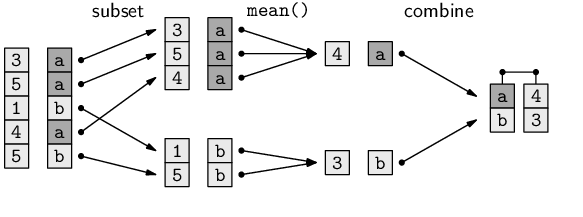  
[figure taken from "Learning pandas - Second Edition by Michael Heydt"](https://learning.oreilly.com/library/view/learning-pandas-/9781787123137/53234dc7-6feb-4695-98d1-19f017ddb8ca.xhtml)

### Aggregation
Aggregration is a data reduction operation. It returns one value per group.

We can aggregate in Pandas with the `aggregate` (`agg`) method:

In [133]:
cdystonia_grouped.agg(np.mean).head()

,obs,week,site,id,age,twstrs,treatment
patient,,,,,,,
1,3.5,7.0,1.0,1.0,65.0,33.000000,1.0
2,3.5,7.0,1.0,2.0,70.0,47.666667,2.0
3,3.5,7.0,1.0,3.0,64.0,30.500000,1.0
4,2.5,3.5,1.0,4.0,59.0,60.000000,0.0
5,3.5,7.0,1.0,5.0,76.0,46.166667,2.0


Note that the `treat` and `sex` variables were not aggregated. 

Pandas knows that it non-sensical to aggregate variables of type `str`, hence these columns are simply ignored by the method.

For some common aggregation functions Pandas has a in-built method, such as `mean`:

In [134]:
grouped = cdystonia.groupby(by="site")["twstrs"].mean()

In [135]:
grouped

site
1    37.600000
2    50.292683
3    34.611111
4    42.083333
5    44.363636
6    46.425287
7    39.861111
8    34.537736
9    47.065574
Name: twstrs, dtype: float64

In [ ]:
grouped.to_csv()

In [207]:
cdystonia_grouped.mean().head()

,week,site,id,age,twstrs,treatment
patient,,,,,,
1,7.0,1.0,1.0,65.0,33.000000,1.0
10,7.0,1.0,10.0,47.0,20.000000,0.0
100,7.0,9.0,2.0,59.0,62.000000,0.0
101,7.0,9.0,3.0,57.0,33.000000,1.0
102,7.0,9.0,4.0,68.0,50.833333,0.0


The `add_prefix` and `add_suffix` methods are used to give the resulting table meaningful column labels:

In [136]:
cdystonia_grouped.mean().add_suffix('_mean').head()

,obs_mean,week_mean,site_mean,id_mean,age_mean,twstrs_mean,treatment_mean
patient,,,,,,,
1,3.5,7.0,1.0,1.0,65.0,33.000000,1.0
2,3.5,7.0,1.0,2.0,70.0,47.666667,2.0
3,3.5,7.0,1.0,3.0,64.0,30.500000,1.0
4,2.5,3.5,1.0,4.0,59.0,60.000000,0.0
5,3.5,7.0,1.0,5.0,76.0,46.166667,2.0


We can also aggregate according to multiple keys:

In [138]:
cdystonia.groupby?

Signature:
cdystonia.groupby(
    by=None,
    axis=0,
    level=None,
    as_index: bool = True,
    sort: bool = True,
    group_keys: bool = True,
    squeeze: bool = <object object at 0x7fb04548a830>,
    observed: bool = False,
    dropna: bool = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, or list of labels
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If an ndarray is passed, the
    values are used as-is determine the g

In [139]:
cdystonia.groupby(by=['week','site']).mean().head()

patient  obs   id        age     twstrs  treatment
week site                                                    
0    1         6.5  1.0  6.5  59.000000  43.083333   1.000000
     2        19.5  1.0  7.5  53.928571  51.857143   0.928571
     3        32.5  1.0  6.5  51.500000  38.750000   1.000000
     4        42.5  1.0  4.5  59.250000  48.125000   1.000000
     5        49.5  1.0  3.5  51.833333  49.333333   1.000000

### Transformation
Transformation replaces the data according to an operation performed "per group".

As an example, we calculate the deviation from the group's mean for each datapoint:

In [140]:
centralize = lambda x: x - x.mean()

cdystonia_grouped.transform(centralize).head()

,obs,week,site,id,age,twstrs,treatment
0,-2.5,-7.0,0,0,0,-1.0,0
1,-1.5,-5.0,0,0,0,-3.0,0
2,-0.5,-3.0,0,0,0,-9.0,0
3,0.5,1.0,0,0,0,4.0,0
4,1.5,5.0,0,0,0,6.0,0


This operation is somewhat nonsensical for patient data, so we only retain the _twstrs_ column:

In [142]:
cdystonia_grouped.transform(centralize)['twstrs'].head()

0   -1.0
1   -3.0
2   -9.0
3    4.0
4    6.0
Name: twstrs, dtype: float64

In [319]:
# To select multiple columns:
cdystonia_grouped[['twstrs','week']].mean().head()

,twstrs,week
patient,,
1,33.000000,7.0
10,20.000000,7.0
100,62.000000,7.0
101,33.000000,7.0
102,50.833333,7.0


By default, `groupby` groups the rows, but we can change this using the `axis` argument.

We also group by one or more levels of a hierarchical index.

In [320]:
cdystonia2.head(10)

week  site  id   treat  age sex  twstrs
patient obs                                         
1       1       0     1   1   5000U   65   F      32
        2       2     1   1   5000U   65   F      30
        3       4     1   1   5000U   65   F      24
        4       8     1   1   5000U   65   F      37
        5      12     1   1   5000U   65   F      39
        6      16     1   1   5000U   65   F      36
2       1       0     1   2  10000U   70   F      60
        2       2     1   2  10000U   70   F      26
        3       4     1   2  10000U   70   F      27
        4       8     1   2  10000U   70   F      41

In [321]:
cdystonia2.groupby(level='obs', axis=0)['twstrs'].mean()

obs
1    45.651376
2    37.611650
3    37.066038
4    39.807692
5    42.913462
6    45.628571
Name: twstrs, dtype: float64

### Apply

We can generalise the split-apply-combine method by using `apply` function. This allows us to perform any function on a grouped dataset and join them into a new DataFrame.

The following function takes a DataFrame, one of its columns name, and an integer `n` (default = 5) as arguments. Then sorts the dataframe by the column, and takes the `n` largest values of that column. 

We can use this function with `apply` to get the largest `n` values from every group of a DataFrame in a single call. 

In [144]:
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]

To see this in action, say we wanted to return the 3 highest twstrs recorded in each week:

In [146]:
cdystonia2

week  site  id  treat  age sex  twstrs
patient obs                                        
1       1       0     1   1  5000U   65   F      32
        2       2     1   1  5000U   65   F      30
        3       4     1   1  5000U   65   F      24
        4       8     1   1  5000U   65   F      37
        5      12     1   1  5000U   65   F      39
...           ...   ...  ..    ...  ...  ..     ...
109     1       0     9  11  5000U   57   M      53
        2       2     9  11  5000U   57   M      38
        4       8     9  11  5000U   57   M      33
        5      12     9  11  5000U   57   M      36
        6      16     9  11  5000U   57   M      51

[631 rows x 7 columns]

In [145]:
top3twstrs = cdystonia2.groupby(['week']).apply(top, column='twstrs', n=3)
top3twstrs.head(n=15)

week  site  id    treat  age sex  twstrs
week patient obs                                          
0    106     1       0     9   8    5000U   43   M      67
     21      1       0     2   9    5000U   47   F      67
     23      1       0     2  11   10000U   53   F      65
2    21      2       2     2   9    5000U   47   F      64
     106     2       2     9   8    5000U   43   M      63
     4       2       2     1   4  Placebo   59   F      61
4    106     3       4     9   8    5000U   43   M      71
     21      3       4     2   9    5000U   47   F      65
     4       3       4     1   4  Placebo   59   F      64
8    100     4       8     9   2  Placebo   59   M      68
     106     4       8     9   8    5000U   43   M      66
     17      4       8     2   5   10000U   45   F      64
12   106     5      12     9   8    5000U   43   M      68
     17      5      12     2   5   10000U   45   F      67
     49      5      12     5   3    5000U   65   F      67

Notice that additional arguments for the applied function can be passed via `apply` after the function name. It assumes that the DataFrame is the first argument.

## Exercise:
Calculate the mean twstrs grouped by sex, treat, week, and age decade. 
Print the results for males between 60 and 70 in week 16 for all treatments.

In [154]:
## Solution
### Insert the Age decade:
cdystonia["decade"] = pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90], labels=["20s", "30s", "40s", "50s", "60s", "70s", "80s"])

In [155]:
cdystonia

,patient,obs,week,site,id,treat,age,sex,twstrs,treatment,decade
0,1,1,0,1,1,5000U,65,F,32,1,60s
1,1,2,2,1,1,5000U,65,F,30,1,60s
2,1,3,4,1,1,5000U,65,F,24,1,60s
3,1,4,8,1,1,5000U,65,F,37,1,60s
4,1,5,12,1,1,5000U,65,F,39,1,60s
...,...,...,...,...,...,...,...,...,...,...,...
626,109,1,0,9,11,5000U,57,M,53,1,50s
627,109,2,2,9,11,5000U,57,M,38,1,50s
628,109,4,8,9,11,5000U,57,M,33,1,50s
629,109,5,12,9,11,5000U,57,M,36,1,50s


In [157]:
## Aggregate:
result = cdystonia.groupby(by=["sex", "decade", "treat","week"])["twstrs"].mean()

In [158]:
result

sex  decade  treat    week
F    20s     10000U   0      NaN
                      2      NaN
                      4      NaN
                      8      NaN
                      12     NaN
                              ..
M    80s     Placebo  2      NaN
                      4      NaN
                      8      NaN
                      12     NaN
                      16     NaN
Name: twstrs, Length: 252, dtype: float64

In [159]:
result.loc["M", "60s", :, 16]

sex  decade  treat    week
M    60s     10000U   16            NaN
             5000U    16      45.833333
             Placebo  16      41.000000
Name: twstrs, dtype: float64

## References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) Wes McKinney

[Advanced Statistical Computing at Vanderbilt University's Department of Biostatistics](http://mybinder.org:/repo/fonnesbeck/bios8366)